# Jupyter Notebook: Data Cleaning for Ecommerce Consumer Behavior Analysis

## Predicting Purchase Intent Using Consumer Behavior Data

This notebook builds and evaluates models to predict the type of purchase intent (e.g., Need-based, Impulsive, etc.) using e-commerce consumer behavior data.


### Load Libraries and Dataset
This section loads essential libraries used for:
- Data preprocessing and cleaning (`pandas`, `numpy`)
- Visualization (`matplotlib`)
- Machine Learning models and evaluation (`scikit-learn`, `keras`, `xgboost`)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns for inspection
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

## Data Loading
### Data Inspection

In [2]:
# Load the data
file_path = 'EcommerceConsumerBehaviorAnalysisData_COS20089_A2.csv'
df = pd.read_csv(file_path)

# Initial inspection
display(df.head())
df.info()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

## Data Cleaning
### Strip leading/trailing whitespace
### Normalize text (remove accents, unify case)
### Keep 'None' entries unchanged

In [3]:
# Clean the Location column
def clean_location(loc):
    if pd.isna(loc) or loc == 'None':
        return loc  # preserve NaN or literal 'None'
    loc_str = str(loc).strip()
    loc_norm = unidecode(loc_str).title()
    return loc_norm

# Apply cleaning
df['Location'] = df['Location'].apply(clean_location)

# Verify uniqueness
display(df['Location'].unique())



array(['Evry', 'Huocheng', 'Huzhen', 'Wiwili', 'Nara', 'Boro Utara',
       'Liren', 'Taocheng', 'Grabo', 'Pryamitsyno', 'Punta Gorda', 'Gyor',
       'Gaosheng', 'Rokytne', 'Alameda', 'Dhankuta', 'Jindong', 'Ngeru',
       'White Rock', 'Monastyrshchina', 'Pangkalanbunut', 'Lederaba',
       'Lugo', 'Sao Roque', 'Bani Khaddash', 'Montpellier', 'Nesovice',
       'Pasirhuni', 'Glendale', 'Tala', 'Marseille', 'Nasielsk',
       'Paris 06', 'Bronnitsy', 'Inayauan', 'Qianjin', 'Bagahanlad',
       'Rzewnie', 'Strabychovo', 'Hongqi', 'Oeoh', "Topol'Noye",
       'Kovarov', 'Majdal Bani Fadil', 'Delta Del Tigre',
       'Santa Cruz La Laguna', 'Manchester', 'Norrkoping', 'Sosno',
       'Pella', 'Namur', 'Benevides', 'Qinghaihu', 'Alfeizerao',
       'Prostredni Becva', 'Oeiras', 'Kythnos', 'Rizal', 'Fullerton',
       'Huaidao', 'Bilice', 'Isla Verde', 'Hunkuyi', 'Shiree',
       'Strezhevoy', 'Longxing', 'Jesus Menendez', 'Hongguang', 'Pilaya',
       'Camp Ithier', 'Holboo', 'Luxi', 'Ost

### Keep currency symbols and formatting

In [4]:
# Preserve Purchase_Amount as-is
print('Purchase_Amount dtype before:', df['Purchase_Amount'].dtype)



Purchase_Amount dtype before: object


### Preserve original strings in 'Time_of_Purchase_str'
### For entries with 'None', keep literal 'None' in cleaned column

In [5]:
# Convert Time_of_Purchase to datetime

df['Time_of_Purchase_str'] = df['Time_of_Purchase']
df['Time_of_Purchase'] = pd.to_datetime(
    df['Time_of_Purchase_str'], infer_datetime_format=True, errors='coerce'
)
# Restore 'None' for those entries
df.loc[df['Time_of_Purchase_str'] == 'None', 'Time_of_Purchase'] = 'None'

# Verify conversion
display(df[['Time_of_Purchase_str', 'Time_of_Purchase']].head())

C:\Users\USER\AppData\Local\Temp\ipykernel_36500\734308569.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Time_of_Purchase'] = pd.to_datetime(
C:\Users\USER\AppData\Local\Temp\ipykernel_36500\734308569.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[df['Time_of_Purchase_str'] == 'None', 'Time_of_Purchase'] = 'None'


,Time_of_Purchase_str,Time_of_Purchase
0,3/1/2024,2024-03-01 00:00:00
1,4/16/2024,2024-04-16 00:00:00
2,3/15/2024,2024-03-15 00:00:00
3,10/4/2024,2024-10-04 00:00:00
4,1/30/2024,2024-01-30 00:00:00


## Prevent loss of values

In [6]:
# Define safe numeric converters to preserve 'None'
def safe_to_float(x):
    if pd.isna(x) or x == 'None':
        return x
    try:
        return float(x)
    except Exception:
        return np.nan

# Convert research time
df['Time_Spent_on_Product_Research(hours)'] = df['Time_Spent_on_Product_Research(hours)'].apply(safe_to_float)

# Convert other integer-like columns safely
int_cols = ['Age', 'Product_Rating', 'Return_Rate', 'Customer_Satisfaction', 'Time_to_Decision']
for col in int_cols:
    def safe_to_int(x):
        if pd.isna(x) or x == 'None':
            return x
        try:
            return int(float(x))
        except Exception:
            return np.nan
    df[col] = df[col].apply(safe_to_int)

# Leave Social_Media_Influence and Engagement_with_Ads untouched to prevent data loss
display(df[['Social_Media_Influence', 'Engagement_with_Ads']].head())

,Social_Media_Influence,Engagement_with_Ads
0,NaN,NaN
1,Medium,High
2,Low,Low
3,High,NaN
4,Medium,NaN


In [7]:
# Final overview
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

None

In [8]:
# Replace all remaining NaN values with literal 'None'
# This ensures no blank entries remain

df = df.fillna('None')


## Cleaned Dataset

In [9]:
# Save cleaned dataset
df.to_csv('EcommerceConsumerBehavior_Cleaned.csv', index=False)
print("Cleaned dataset saved to EcommerceConsumerBehavior_Cleaned.csv")
display(df.info())

# Save cleaned data
df.to_csv('EcommerceConsumerBehavior_Cleaned.csv', index=False)
print("Cleaned dataset saved to EcommerceConsumerBehavior_Cleaned.csv")

Cleaned dataset saved to EcommerceConsumerBehavior_Cleaned.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Customer_ID                            1000 non-null   object        
 1   Age                                    1000 non-null   int64         
 2   Gender                                 1000 non-null   object        
 3   Income_Level                           1000 non-null   object        
 4   Marital_Status                         1000 non-null   object        
 5   Education_Level                        1000 non-null   object        
 6   Occupation                             1000 non-null   object        
 7   Location                               1000 non-null   object        
 8   Purchase_Category                      1000 non-null   object        
 9   P

None

Cleaned dataset saved to EcommerceConsumerBehavior_Cleaned.csv


## Logistic Regression, Random Forest, XGBoost and Neural Network

# Import necessary libraries for data manipulation, visualization, modeling, and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Data Preprocessing
- Dropped `Customer_ID` (likely a unique identifier) and `Time_of_Purchase_str` (presumably redundant).
- Checked for missing values.
- Filled any missing numeric values using the **median** to avoid bias from outliers.

In [10]:
df = pd.read_csv('EcommerceConsumerBehavior_Cleaned.csv')  # Replace with actual file

# Drop non-informative columns
df.drop(['Customer_ID', 'Time_of_Purchase_str'], axis=1, inplace=True)

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Fill missing values (if any) with median
df.fillna(df.median(numeric_only=True), inplace=True)

Missing values per column:
 Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Purchase           

### Feature and Target Separation
- Target: `Purchase_Intent` is encoded for classification.
- Features are split into **categorical** and **numerical** for tailored preprocessing.

In [11]:
target = 'Purchase_Intent'
X = df.drop(target, axis=1)
y = df[target]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Separate features by type
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

### Preprocessing and Pipelines
To streamline preprocessing and modeling:
- A `ColumnTransformer` standardizes numeric features and one-hot encodes categorical ones.
- Pipelines are constructed for:
  - **Logistic Regression** (baseline linear model)
  - **Random Forest** (ensemble model that handles non-linear relationships)

In [12]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

logreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='ovr'))
])

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

### Train/Test Split
- Split the dataset into 80% training and 20% testing.
- Used **stratified sampling** to maintain class balance in both splits.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

### Model Training
- Trained both models using the training set.
- Predictions made on the test set.
- Random Forest and Logic Regression models

In [14]:
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### Model Evaluation
 - Evaluated performance using:
  - **Classification report** (Precision, Recall, F1)
  - **Confusion matrix** to inspect correct vs. incorrect predictions.
- **Random Forest outperformed** Logistic Regression in F1 score and accuracy.

In [15]:
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Logistic Regression Performance:
              precision    recall  f1-score   support

   Impulsive       0.20      0.22      0.21        50
  Need-based       0.17      0.18      0.17        51
     Planned       0.21      0.20      0.21        49
 Wants-based       0.14      0.12      0.13        50

    accuracy                           0.18       200
   macro avg       0.18      0.18      0.18       200
weighted avg       0.18      0.18      0.18       200

Confusion Matrix:
 [[11 15 13 11]
 [15  9 12 15]
 [14 14 10 11]
 [16 15 13  6]]

Random Forest Performance:
              precision    recall  f1-score   support

   Impulsive       0.18      0.20      0.19        50
  Need-based       0.25      0.31      0.28        51
     Planned       0.24      0.18      0.21        49
 Wants-based       0.29      0.24      0.26        50

    accuracy                           0.23       200
   macro avg       0.24      0.23      0.23       200
weighted avg       0.24      0.23      0.23 

### Accuracy & F1 Score Comparison
Compare model performance on two metrics:
- **Accuracy**: Overall correctness.
- **F1 Score (weighted)**: Accounts for class imbalance.

This side-by-side bar chart highlights trade-offs between precision and recall, and emphasizes model generalizability.

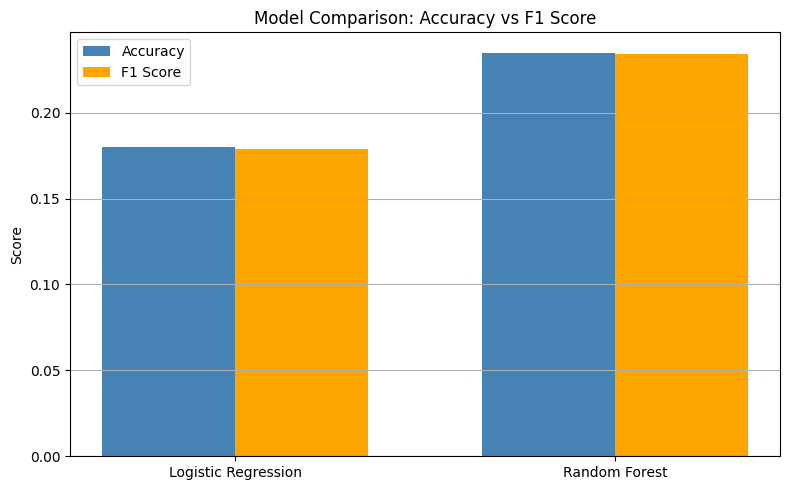

In [16]:
logreg_acc = accuracy_score(y_test, y_pred_logreg)
rf_acc = accuracy_score(y_test, y_pred_rf)

logreg_f1 = f1_score(y_test, y_pred_logreg, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

models = ['Logistic Regression', 'Random Forest']
accuracies = [logreg_acc, rf_acc]
f1_scores = [logreg_f1, rf_f1]

plt.figure(figsize=(8, 5))
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x, accuracies, width=bar_width, label='Accuracy', color='steelblue')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color='orange')

plt.ylabel('Score')
plt.title('Model Comparison: Accuracy vs F1 Score')
plt.xticks(x + bar_width / 2, models)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Feature Importance (Random Forest)
- Visualized top 10 features from Random Forest.
- Helps identify **key predictors** of consumer purchase intent.
- Insights can support **targeted marketing or UX improvements**.

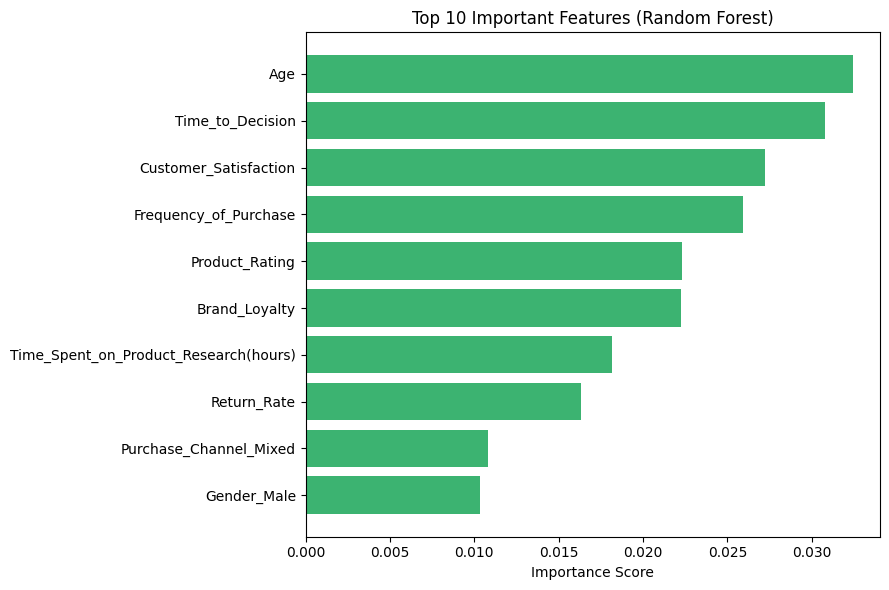

In [17]:
ohe = rf_model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_cols)
all_feature_names = numeric_cols + list(encoded_cat_features)

rf_clf = rf_model.named_steps['classifier']
importances = rf_clf.feature_importances_

indices = np.argsort(importances)[-10:][::-1]
top_features = [all_feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(9, 6))
plt.barh(top_features, top_importances, color='mediumseagreen')
plt.xlabel('Importance Score')
plt.title('Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

###  Additional Visualisations

#### Boxplot: Time Spent on Product Research by Purchase Intent

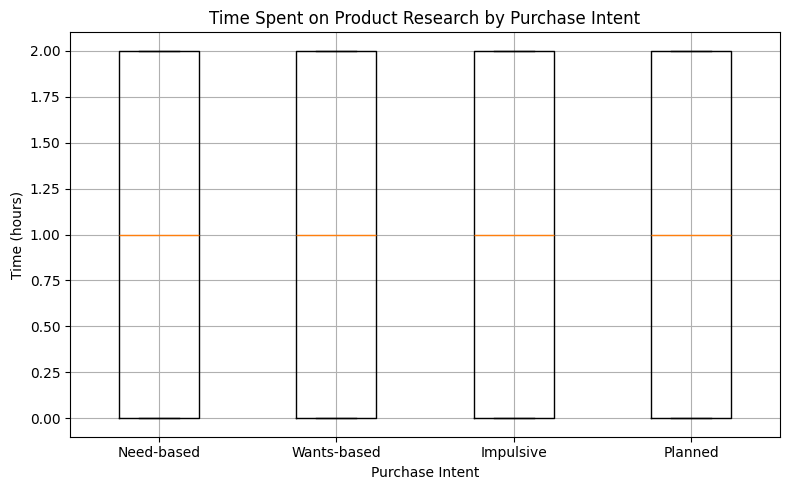

In [18]:
plt.figure(figsize=(8, 5))
purchase_intents = df['Purchase_Intent'].unique()
data = [df[df['Purchase_Intent'] == intent]['Time_Spent_on_Product_Research(hours)'] for intent in purchase_intents]
plt.boxplot(data, labels=purchase_intents)
plt.title('Time Spent on Product Research by Purchase Intent')
plt.ylabel('Time (hours)')
plt.xlabel('Purchase Intent')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Bar Plot: Count of Each Purchase Intent

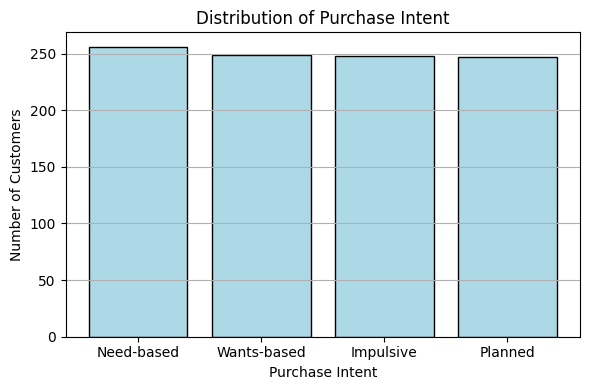

In [19]:
plt.figure(figsize=(6, 4))
intent_counts = df['Purchase_Intent'].value_counts()
plt.bar(intent_counts.index, intent_counts.values, color='lightblue', edgecolor='black')
plt.title('Distribution of Purchase Intent')
plt.ylabel('Number of Customers')
plt.xlabel('Purchase Intent')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Histogram: Distribution of Purchase Amount

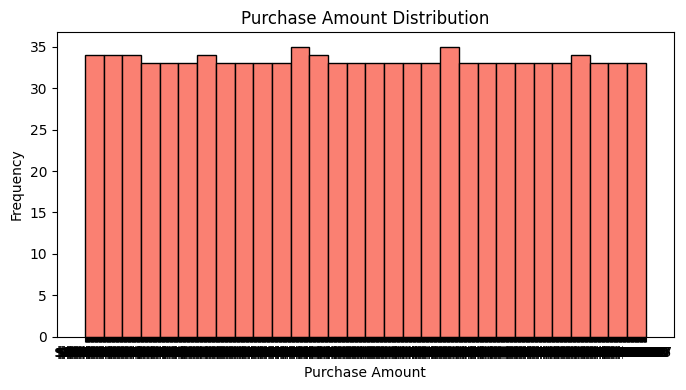

In [20]:
plt.figure(figsize=(7, 4))
plt.hist(df['Purchase_Amount'], bins=30, color='salmon', edgecolor='black')
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Configuring XGBoost and Neural Network

In [21]:
# Convert currency to float
df["Purchase_Amount"] = df["Purchase_Amount"].replace('[\\$,]', '', regex=True).astype(float)

# Encode features
label_encoders = {}
for column in df.select_dtypes(include=['object', 'bool']).columns:
    if column != 'Purchase_Intent':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode target
target_le = LabelEncoder()
df["Purchase_Intent"] = target_le.fit_transform(df["Purchase_Intent"])

# Train-test split
y = df["Purchase_Intent"]
X = df.drop("Purchase_Intent", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost
- Training the XGBoost Model
- Printing the report

In [22]:
#XGBoost
# Reconvert scaled NumPy arrays back to DataFrames with original column names
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Train initial XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_df, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test_df)

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds, target_names=target_le.classes_))

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

   Impulsive       0.35      0.35      0.35        52
  Need-based       0.30      0.30      0.30        46
     Planned       0.36      0.31      0.34        54
 Wants-based       0.31      0.35      0.33        48

    accuracy                           0.33       200
   macro avg       0.33      0.33      0.33       200
weighted avg       0.33      0.33      0.33       200



# Neural Network
- Training the Neural Network model
- Printing the classification report

In [23]:
#Neural Network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train_cat, epochs=20, batch_size=32, verbose=0)

nn_preds = nn_model.predict(X_test)
nn_preds_labels = np.argmax(nn_preds, axis=1)

print("Neural Network Classification Report:")
print(classification_report(y_test, nn_preds_labels, target_names=target_le.classes_))

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

   Impulsive       0.38      0.38      0.38        52
  Need-based       0.25      0.28      0.27        46
     Planned       0.25      0.24      0.25        54
 Wants-based       0.29      0.27      0.28        48

    accuracy                           0.29       200
   macro avg       0.29      0.29      0.29       200
weighted avg       0.29      0.29      0.29       200



## Confusion Metric

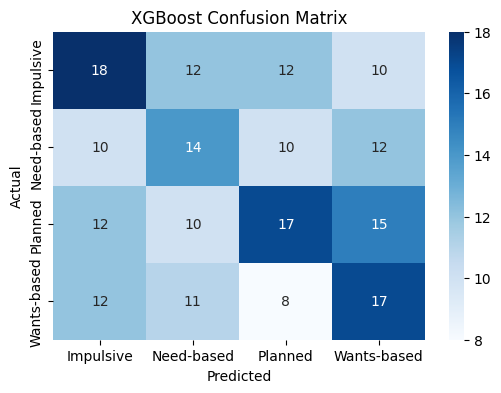

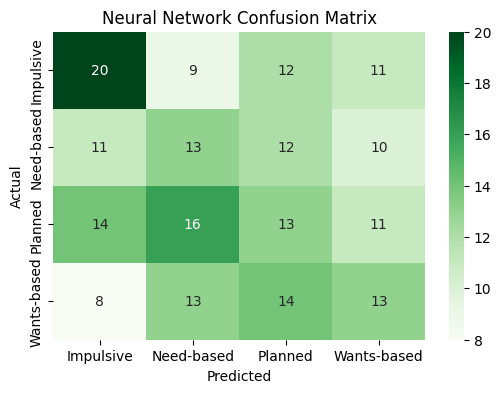

In [24]:
#Confusion Metric
# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Blues',
            xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Neural Network
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, nn_preds_labels), annot=True, fmt='d', cmap='Greens', 
            xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## XGBoost with Hyperparameter tuning using GridSearchCV
- Create the best XGBoost Model

In [25]:
# Grid Search with DataFrame input to retain column names
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 150]
}

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='precision_macro', verbose=1)
grid_search.fit(X_train_df, y_train)

# Best model
best_xgb_model = grid_search.best_estimator_
best_preds = best_xgb_model.predict(X_test_df)

print("Best XGBoost Model Classification Report:")
print(classification_report(y_test, best_preds, target_names=target_le.classes_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:41] WARNING: C:\actions-r

Best XGBoost Model Classification Report:
              precision    recall  f1-score   support

   Impulsive       0.30      0.25      0.27        52
  Need-based       0.23      0.30      0.26        46
     Planned       0.31      0.31      0.31        54
 Wants-based       0.32      0.27      0.29        48

    accuracy                           0.28       200
   macro avg       0.29      0.28      0.28       200
weighted avg       0.29      0.28      0.29       200



## Sample Prediction for Neural Network and XGBoost

In [26]:
# Decode predictions to label names
final_xgb_preds = target_le.inverse_transform(best_preds)
final_nn_preds = target_le.inverse_transform(nn_preds_labels)

# Show sample predictions
print("Sample Final XGBoost Predictions:", final_xgb_preds[:10])
print("Sample Final Neural Network Predictions:", final_nn_preds[:10])

Sample Final XGBoost Predictions: ['Wants-based' 'Impulsive' 'Need-based' 'Planned' 'Impulsive' 'Impulsive'
 'Planned' 'Planned' 'Need-based' 'Impulsive']
Sample Final Neural Network Predictions: ['Need-based' 'Impulsive' 'Impulsive' 'Planned' 'Impulsive' 'Planned'
 'Planned' 'Wants-based' 'Need-based' 'Wants-based']


## Model Evaluation with ROC Curve and Accuracy
### ROC Curve for XGBoost

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


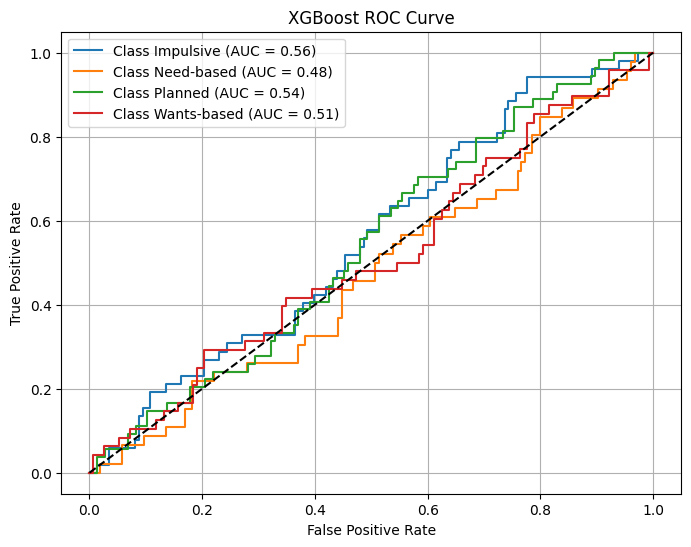

In [27]:
# Binarize the output labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Predict probabilities
xgb_probs = best_xgb_model.predict_proba(X_test)
nn_probs = nn_model.predict(X_test)

# Compute ROC curves and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], xgb_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot XGBoost ROC
plt.figure(figsize=(8,6))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {target_le.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('XGBoost ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

### ROC Curve for Neural Network

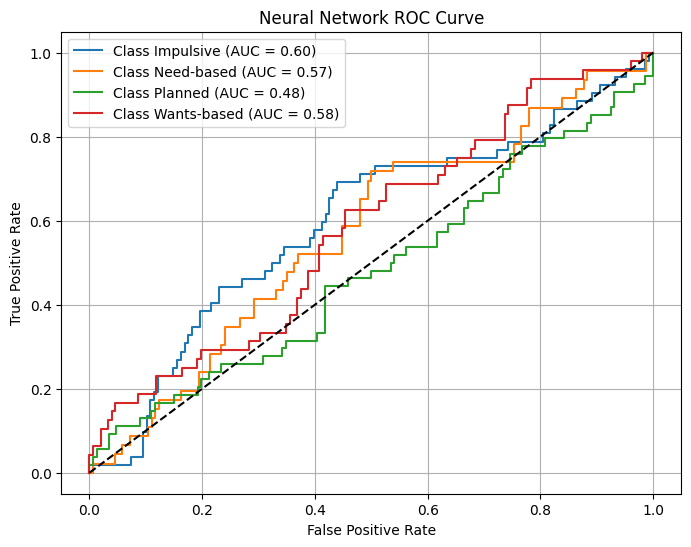

In [28]:
# Compute ROC curves and AUC for NN
fpr_nn = dict()
tpr_nn = dict()
roc_auc_nn = dict()
for i in range(4):
    fpr_nn[i], tpr_nn[i], _ = roc_curve(y_test_bin[:, i], nn_probs[:, i])
    roc_auc_nn[i] = auc(fpr_nn[i], tpr_nn[i])

# Plot NN ROC
plt.figure(figsize=(8,6))
for i in range(4):
    plt.plot(fpr_nn[i], tpr_nn[i], label=f'Class {target_le.classes_[i]} (AUC = {roc_auc_nn[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Neural Network ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

### Accuracy Score

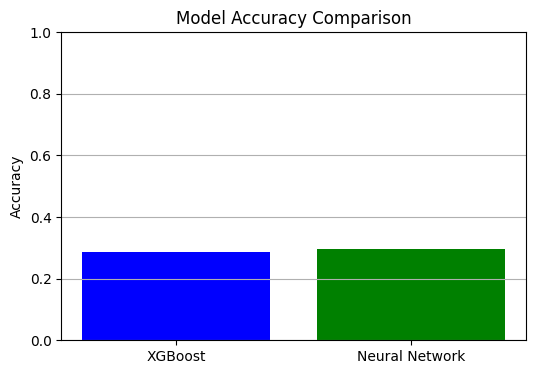

In [29]:
# Compute accuracy
acc_xgb = accuracy_score(y_test, best_preds)
acc_nn = accuracy_score(y_test, nn_preds_labels)

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(['XGBoost', 'Neural Network'], [acc_xgb, acc_nn], color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

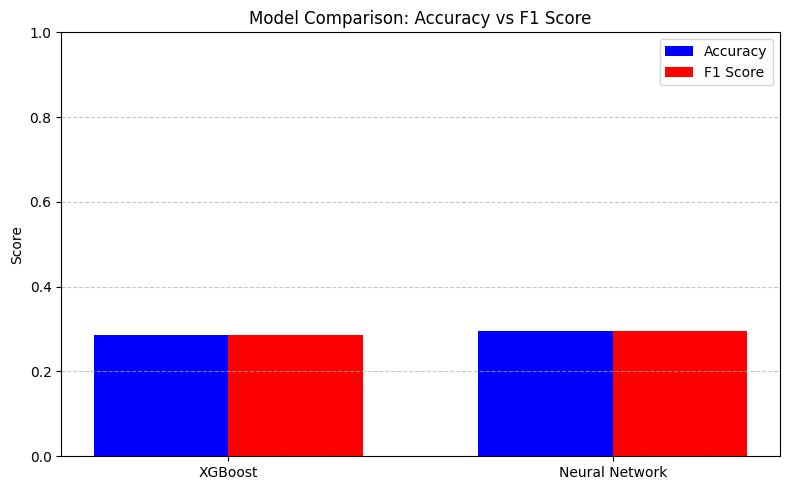

In [32]:
# Compute metrics
xgb_acc = accuracy_score(y_test, best_preds)
nn_acc = accuracy_score(y_test, nn_preds_labels)

xgb_f1 = f1_score(y_test, best_preds, average='weighted')
nn_f1 = f1_score(y_test, nn_preds_labels, average='weighted')

# Bar chart setup
models = ['XGBoost', 'Neural Network']
x = np.arange(len(models))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, [xgb_acc, nn_acc], width, label='Accuracy', color='blue')
bars2 = ax.bar(x + width/2, [xgb_f1, nn_f1], width, label='F1 Score', color='red')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Accuracy vs F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Top 10 Features for XGBoost

<Figure size 1000x600 with 0 Axes>

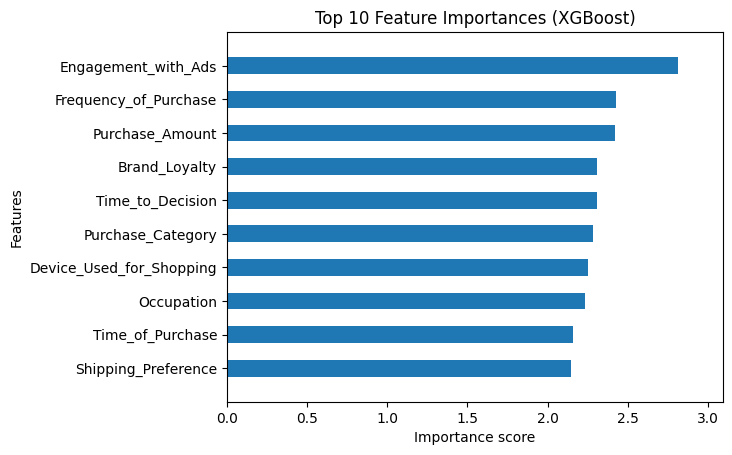

In [31]:
# Plot top 10 features using readable column names
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_xgb_model, importance_type='gain', max_num_features=10, 
                    height=0.5, show_values=False)
plt.title('Top 10 Feature Importances (XGBoost)')
plt.grid()
plt.show()